# ARTIFICIAL NEURAL NETWORK

## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
import jcopml

In [3]:
import csv
import os

In [4]:
import seaborn as sns
sns.__version__

'0.11.1'

In [5]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from urllib.request import urlretrieve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from keras.wrappers.scikit_learn import KerasClassifier

### IMPORTING THE DATASET

In [8]:
hepatitis = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv'
save = urlretrieve(hepatitis,'D:/Hepatitis.csv')
dataset = pd.read_csv(hepatitis, sep=',')

### MENAMPILKAN JUMLAH BARIS DAN KOLOM DATASET

In [9]:
print(f'SHAPE OF DATASET: {dataset.shape}')

SHAPE OF DATASET: (615, 14)


### MENAMPILKAN 25 BARIS PERTAMA DATASET

In [10]:
dataset.head(25)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


### MENAMPILKAN 25 BARIS TERAKHIR DATASET

In [11]:
dataset.tail(25)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
590,591,3=Cirrhosis,46,m,20.0,NaN,62.0,113.0,254.0,1.48,NaN,114.0,138.0,NaN
591,592,3=Cirrhosis,46,m,35.0,109.6,2.3,19.2,11.0,7.10,4.10,1079.1,105.6,69.1
592,593,3=Cirrhosis,47,m,42.0,NaN,159.0,102.0,11.0,6.29,5.50,58.0,201.0,79.0
593,594,3=Cirrhosis,51,m,39.0,66.0,29.6,185.0,19.0,2.00,3.60,58.3,399.5,79.4
594,595,3=Cirrhosis,51,m,33.0,29.6,4.5,66.6,91.0,4.02,4.08,75.9,28.5,62.3
595,596,3=Cirrhosis,56,m,27.0,81.1,17.0,319.8,37.0,1.42,3.54,66.9,93.7,65.3
596,597,3=Cirrhosis,56,m,23.0,105.6,5.1,123.0,43.0,1.80,2.40,62.7,35.9,62.8
597,598,3=Cirrhosis,56,m,30.0,40.4,0.9,80.3,119.0,1.88,1.43,79.3,17.6,54.2
598,599,3=Cirrhosis,58,m,31.0,143.1,7.0,181.8,58.0,3.29,3.92,66.4,273.7,78.1
599,600,3=Cirrhosis,59,m,36.0,49.7,5.2,110.1,37.0,2.29,3.68,118.2,56.9,74.8


### MENAMPILKAN SUMMARY DATASET

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,614.0,41.620195,5.780629,14.90,38.800,41.95,45.200,82.20
ALP,597.0,68.283920,26.028315,11.30,52.500,66.20,80.100,416.60
ALT,614.0,28.450814,25.469689,0.90,16.400,23.00,33.075,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,605.0,5.368099,1.132728,1.43,4.610,5.30,6.060,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


### MENAMPILKAN LABEL PADA KOLOM TARGET

In [13]:
dataset['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

### MENAMPILKAN JUMLAH LABEL PADA KOLOM TARGET

In [14]:
dataset.Category.value_counts().sort_values(ascending = False)

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

### MENAMPILKAN PLOT JUMLAH LABEL PADA KOLOM TARGET

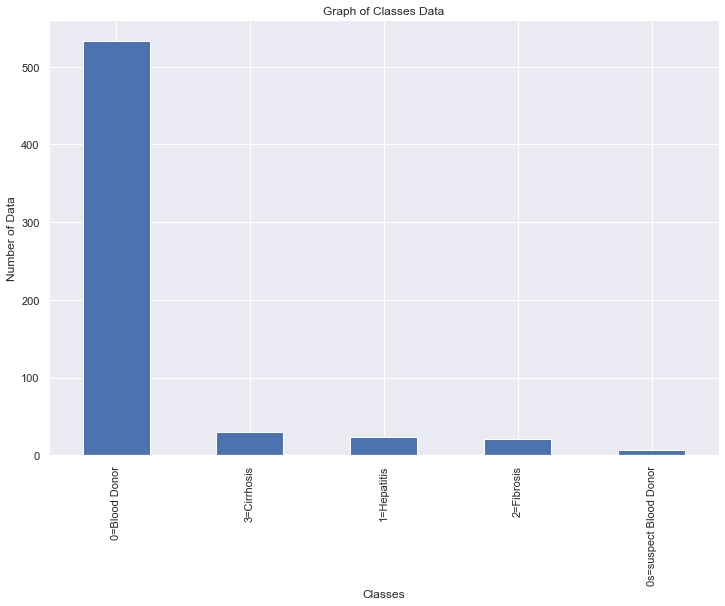

In [15]:
fig = plt.figure(figsize = (12, 8))
sns.set(style = "darkgrid")
dataset["Category"].value_counts().plot(kind = "bar")

# Labeling the Y-axis
plt.ylabel("Number of Data")

# Labeling the X-axis
plt.xlabel("Classes")

# Give a title to the graph
plt.title("Graph of Classes Data")

plt.show()

### IMPORT plot_missing_value DARI MODULE jcopml

In [16]:
from jcopml.plot import plot_missing_value

,missing_value,%
Unnamed: 0,0,0.00
Category,0,0.00
Age,0,0.00
Sex,0,0.00
ALB,1,0.16
ALP,18,2.93
ALT,1,0.16
AST,0,0.00
BIL,0,0.00
CHE,0,0.00


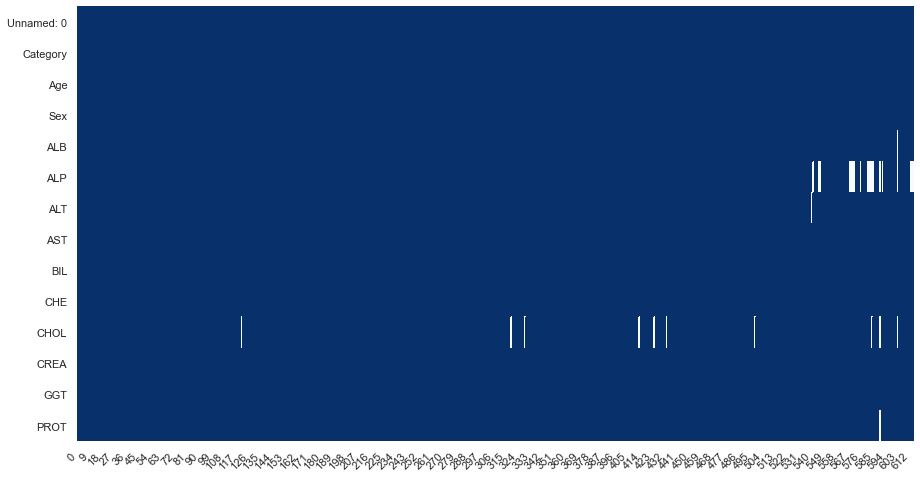

In [17]:
plot_missing_value(dataset, return_df=True)

### DROP MISSING VALUES

In [18]:
dataset = dataset.dropna(axis = 1)

,missing_value,%
Unnamed: 0,0,0.0
Category,0,0.0
Age,0,0.0
Sex,0,0.0
AST,0,0.0
BIL,0,0.0
CHE,0,0.0
CREA,0,0.0
GGT,0,0.0


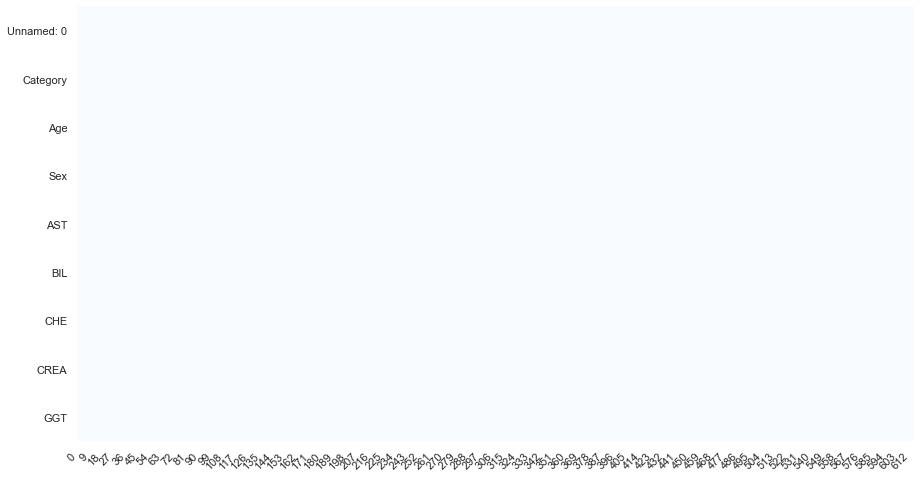

In [19]:
plot_missing_value(dataset, return_df=True)

### MENAMPILKAN NAMA-NAMA KOLOM PADA DATASET

In [20]:
print(dataset.columns)

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'AST', 'BIL', 'CHE', 'CREA',
       'GGT'],
      dtype='object')


### MENGUBAH TYPE DATASET KE FLOAT

In [21]:
dataset.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
AST           float64
BIL           float64
CHE           float64
CREA          float64
GGT           float64
dtype: object

### MENAMPILKAN INFORMASI DATASET

In [22]:
dataset.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Category    object 
 2   Age         int64  
 3   Sex         object 
 4   AST         float64
 5   BIL         float64
 6   CHE         float64
 7   CREA        float64
 8   GGT         float64
dtypes: float64(5), int64(2), object(2)
memory usage: 43.4+ KB


<ipython-input-22-10c89f930425>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  dataset.info(verbose = True, null_counts = False)


### MENAMPILKAN TYPE DATASET

In [23]:
type(dataset)

pandas.core.frame.DataFrame

## DATA PREPROCESSING

### LABEL ENCODER COLUMN AGE

In [24]:
encoder = LabelEncoder()

In [25]:
categorical_data = ["Sex"]

In [26]:
for kolom in categorical_data:
    dataset[kolom] = encoder.fit_transform(dataset[kolom])

In [27]:
dataset

,Unnamed: 0,Category,Age,Sex,AST,BIL,CHE,CREA,GGT
0,1,0=Blood Donor,32,1,22.1,7.5,6.93,106.0,12.1
1,2,0=Blood Donor,32,1,24.7,3.9,11.17,74.0,15.6
2,3,0=Blood Donor,32,1,52.6,6.1,8.84,86.0,33.2
3,4,0=Blood Donor,32,1,22.6,18.9,7.33,80.0,33.8
4,5,0=Blood Donor,32,1,24.8,9.6,9.15,76.0,29.9
...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,0,110.3,50.0,5.57,55.7,650.9
611,612,3=Cirrhosis,64,0,44.4,20.0,1.54,63.0,35.9
612,613,3=Cirrhosis,64,0,99.0,48.0,1.66,66.7,64.2
613,614,3=Cirrhosis,46,0,62.0,20.0,3.56,52.0,50.0


### ONE HOT ENCODER DATA CATEGORICAL USING PANDAS

In [28]:
label = pd.get_dummies(dataset['Category'])
label.columns = ['Category_' + str(x) for x in label.columns]

### MENGGABUNGKAN DATASET LABEL DENGAN DATASET AWAL

In [29]:
dataset = pd.concat([dataset, label], axis = 1)
dataset.head(25)

,Unnamed: 0,Category,Age,Sex,AST,BIL,CHE,CREA,GGT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,1,0=Blood Donor,32,1,22.1,7.5,6.93,106.0,12.1,1,0,0,0,0
1,2,0=Blood Donor,32,1,24.7,3.9,11.17,74.0,15.6,1,0,0,0,0
2,3,0=Blood Donor,32,1,52.6,6.1,8.84,86.0,33.2,1,0,0,0,0
3,4,0=Blood Donor,32,1,22.6,18.9,7.33,80.0,33.8,1,0,0,0,0
4,5,0=Blood Donor,32,1,24.8,9.6,9.15,76.0,29.9,1,0,0,0,0
5,6,0=Blood Donor,32,1,19.7,12.3,9.92,111.0,91.0,1,0,0,0,0
6,7,0=Blood Donor,32,1,17.8,8.5,7.01,70.0,16.9,1,0,0,0,0
7,8,0=Blood Donor,32,1,31.1,16.1,5.82,109.0,21.5,1,0,0,0,0
8,9,0=Blood Donor,32,1,21.2,6.9,8.69,83.0,13.7,1,0,0,0,0
9,10,0=Blood Donor,32,1,20.0,35.2,5.46,81.0,15.9,1,0,0,0,0


In [30]:
encoder = LabelEncoder()
categorical_data = ["Category"]
for kolom in categorical_data:
    dataset[kolom] = encoder.fit_transform(dataset[kolom])

In [31]:
dataset.head(25)

,Unnamed: 0,Category,Age,Sex,AST,BIL,CHE,CREA,GGT,Category_0=Blood Donor,Category_0s=suspect Blood Donor,Category_1=Hepatitis,Category_2=Fibrosis,Category_3=Cirrhosis
0,1,0,32,1,22.1,7.5,6.93,106.0,12.1,1,0,0,0,0
1,2,0,32,1,24.7,3.9,11.17,74.0,15.6,1,0,0,0,0
2,3,0,32,1,52.6,6.1,8.84,86.0,33.2,1,0,0,0,0
3,4,0,32,1,22.6,18.9,7.33,80.0,33.8,1,0,0,0,0
4,5,0,32,1,24.8,9.6,9.15,76.0,29.9,1,0,0,0,0
5,6,0,32,1,19.7,12.3,9.92,111.0,91.0,1,0,0,0,0
6,7,0,32,1,17.8,8.5,7.01,70.0,16.9,1,0,0,0,0
7,8,0,32,1,31.1,16.1,5.82,109.0,21.5,1,0,0,0,0
8,9,0,32,1,21.2,6.9,8.69,83.0,13.7,1,0,0,0,0
9,10,0,32,1,20.0,35.2,5.46,81.0,15.9,1,0,0,0,0


### CREATING X AND Y

In [32]:
X = dataset.iloc[:, 2:9].values
Y = dataset.iloc[:, 9:14].values

### CONVERT DataFrame INTO np array

In [33]:
X = np.asarray(X)
Y = np.asarray(Y)

### IMPORTING train_test_split DARI MODULE sklearn

In [34]:
from sklearn.model_selection import train_test_split

### SPLIT THE DATA SET IN A TRAINING SET (70%) AND A TESTING SET (30%)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## FEATURE SCALING

### IMPORTING StandardScaler DARI MODULE sklearn

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### MENAMPILKAN DATA X TRAINING, DATA X TESTING, DATA Y TRAINING, DAN DATA Y TESTING

In [38]:
print ('\n\n DATA X TRAINING: \n\n', X_train)



 DATA X TRAINING: 

 [[-0.73116386 -1.26730446 -0.34930325 ... -0.31105137  0.35189347
  -0.52144972]
 [ 0.35672701 -1.26730446 -0.34271305 ... -1.02688837  0.11599949
  -0.52343868]
 [ 0.55452535  0.78907636 -0.33941796 ... -0.98129365 -0.19852581
  -0.08188963]
 ...
 [-0.9289622  -1.26730446 -0.4942875  ... -1.37340818 -0.98483906
  -0.27282976]
 [ 0.15892867  0.78907636 -0.17136802 ... -0.02836415  0.3125778
  -0.31459791]
 [ 1.0490212   0.78907636  0.95555507 ... -1.04512625  2.68331225
   9.01561191]]


In [39]:
print ('\n\n DATA X TESTING: \n\n', X_test)



 DATA X TESTING: 

 [[-1.12676054  0.78907636  0.13837108 ...  0.00811162  0.66641876
  -0.31459791]
 [ 0.85122286 -1.26730446 -0.12194157 ... -0.80803374 -0.59168243
   2.13977832]
 [ 0.35672701  0.78907636 -0.20102389 ...  0.83793539  0.23394648
  -0.03017668]
 ...
 [ 0.55452535  0.78907636  0.28994553 ...  0.24064465  1.29546936
   3.28740805]
 [-1.42345805 -1.26730446 -0.44156596 ... -0.38400291 -0.90620773
  -0.52343868]
 [ 0.75232369  0.78907636 -0.43497576 ... -0.31561084  0.03736817
  -0.14951426]]


In [40]:
print ('\n\n DATA Y TRAINING: \n\n', Y_train)



 DATA Y TRAINING: 

 [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]]


In [41]:
print ('\n\n DATA Y TESTING: \n\n', Y_test)



 DATA Y TESTING: 

 [[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0

### MENAMPILKAN JUMLAH BARIS DAN KOLOM DATA X TRAINING

In [42]:
print(f'X_train: {X_train.shape}')

X_train: (430, 7)


In [43]:
print(f'X_test: {X_test.shape}')

X_test: (185, 7)


In [44]:
print(f'Y_train: {Y_train.shape}')

Y_train: (430, 5)


In [45]:
print(f'Y_test: {Y_test.shape}')

Y_test: (185, 5)


## BUILDING THE ARTIFICIAL NEURAL NETWORK

### IMPORTING Sequential DARI MODULE tensorflow

In [46]:
from tensorflow.keras.models import Sequential

### IMPORTING Dense DARI MODULE tensorflow

In [47]:
from tensorflow.keras.layers import Dense

### BUILD ANN

In [48]:
model = Sequential()
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
model.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1 = model.fit(X_train,Y_train, epochs=100,batch_size=5,validation_data=(X_test,Y_test))

Epoch 1/100
86/86 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.8326 - val_loss: 0.4651 - val_accuracy: 0.8649
Epoch 2/100
86/86 [==============================] - 0s 770us/step - loss: 0.4175 - accuracy: 0.8674 - val_loss: 0.3534 - val_accuracy: 0.8649
Epoch 3/100
86/86 [==============================] - 0s 768us/step - loss: 0.2792 - accuracy: 0.8674 - val_loss: 0.2167 - val_accuracy: 0.8649
Epoch 4/100
86/86 [==============================] - 0s 752us/step - loss: 0.1768 - accuracy: 0.8674 - val_loss: 0.1583 - val_accuracy: 0.8649
Epoch 5/100
86/86 [==============================] - 0s 717us/step - loss: 0.1405 - accuracy: 0.8674 - val_loss: 0.1413 - val_accuracy: 0.8649
Epoch 6/100
86/86 [==============================] - 0s 721us/step - loss: 0.1279 - accuracy: 0.8674 - val_loss: 0.1344 - val_accuracy: 0.8649
Epoch 7/100
86/86 [==============================] - 0s 768us/step - loss: 0.1226 - accuracy: 0.8674 - val_loss: 0.1306 - val_accuracy: 0.8649
E

Epoch 58/100
86/86 [==============================] - 0s 724us/step - loss: 0.0963 - accuracy: 0.9047 - val_loss: 0.1197 - val_accuracy: 0.8973
Epoch 59/100
86/86 [==============================] - 0s 640us/step - loss: 0.0960 - accuracy: 0.9047 - val_loss: 0.1161 - val_accuracy: 0.8973
Epoch 60/100
86/86 [==============================] - 0s 919us/step - loss: 0.0959 - accuracy: 0.9047 - val_loss: 0.1180 - val_accuracy: 0.8973
Epoch 61/100
86/86 [==============================] - 0s 769us/step - loss: 0.0956 - accuracy: 0.9070 - val_loss: 0.1189 - val_accuracy: 0.8973
Epoch 62/100
86/86 [==============================] - 0s 722us/step - loss: 0.0953 - accuracy: 0.9047 - val_loss: 0.1207 - val_accuracy: 0.8973
Epoch 63/100
86/86 [==============================] - 0s 614us/step - loss: 0.0950 - accuracy: 0.9070 - val_loss: 0.1179 - val_accuracy: 0.8973
Epoch 64/100
86/86 [==============================] - 0s 911us/step - loss: 0.0949 - accuracy: 0.9023 - val_loss: 0.1187 - val_accuracy:

### LOSS & ACCURACY

In [51]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.8865
Akurasi Testing ANN: 0.8864864706993103


### GRAFIK LOSS & VALIDATION

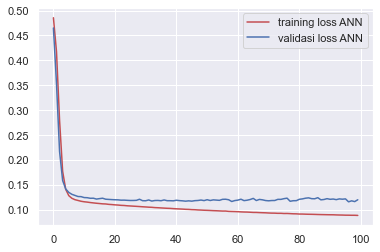

In [52]:
epochs = range(100)

loss = model1.history['loss']
val_loss = model1.history['val_loss']

plt.plot(epochs,loss,'r',label='training loss ANN')
plt.plot(epochs,val_loss,'b',label='validasi loss ANN')
plt.legend()

### PREDICT &CLASSIFICATION REPORT

In [53]:
predict = model.predict(X_test)
print(classification_report(Y_test.argmax(axis=1), predict.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       160
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         6
           4       0.38      0.80      0.52        10

    accuracy                           0.89       185
   macro avg       0.27      0.35      0.30       185
weighted avg       0.85      0.89      0.87       185



C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CONFUSION MATRIX

In [54]:
cm = confusion_matrix(Y_test.argmax(axis=1), predict.argmax(axis=1))
cm

array([[156,   0,   1,   0,   3],
       [  2,   0,   0,   0,   2],
       [  2,   0,   0,   0,   3],
       [  0,   0,   1,   0,   5],
       [  2,   0,   0,   0,   8]], dtype=int64)

### VISUALIZATION

Text(0.5, 1.0, 'Confusion Matrix for Hepatitis Dataset using ANN')

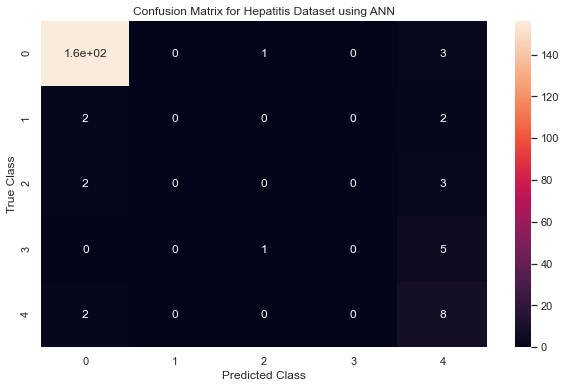

In [55]:
#Plotting confusion matrix

fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Hepatitis Dataset using ANN")

### ANN USING PARAMETER TUNING

In [56]:
np.random.seed(123)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

#Define function
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
    classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


#Parameter Tuning
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [32, 64],
              'epochs': [100, 200,300],
              'optimizer': ['adam', 'rmsprop']
              }

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

grid_search = grid_search.fit(X_train, Y_train)


Epoch 1/100
11/11 [==============================] - 0s 909us/step - loss: 0.0893 - accuracy: 0.9099
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9128
Epoch 3/100
11/11 [==============================] - 0s 1000us/step - loss: 0.0891 - accuracy: 0.9128
Epoch 4/100
11/11 [==============================] - 0s 909us/step - loss: 0.0891 - accuracy: 0.9128
Epoch 5/100
11/11 [==============================] - 0s 909us/step - loss: 0.0890 - accuracy: 0.9128
Epoch 6/100
11/11 [==============================] - 0s 909us/step - loss: 0.0890 - accuracy: 0.9128
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9128
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 0.9128
Epoch 9/100
11/11 [==============================] - 0s 818us/step - loss: 0.0888 - accuracy: 0.9128
Epoch 10/100
11/11 [==============================] - 0s 909us/step - loss: 0.0888 - accuracy: 0

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 12/100
11/11 [==============================] - 0s 818us/step - loss: 0.0812 - accuracy: 0.9244
Epoch 13/100
11/11 [==============================] - 0s 818us/step - loss: 0.0811 - accuracy: 0.9244
Epoch 14/100
11/11 [==============================] - 0s 818us/step - loss: 0.0811 - accuracy: 0.9244
Epoch 15/100
11/11 [==============================] - 0s 818us/step - loss: 0.0810 - accuracy: 0.9244
Epoch 16/100
11/11 [==============================] - 0s 909us/step - loss: 0.0810 - accuracy: 0.9244
Epoch 17/100
11/11 [==============================] - 0s 909us/step - loss: 0.0809 - accuracy: 0.9244
Epoch 18/100
11/11 [==============================] - 0s 909us/step - loss: 0.0809 - accuracy: 0.9244
Epoch 19/100
11/11 [==============================] - 0s 909us/step - loss: 0.0808 - accuracy: 0.9244
Epoch 20/100
11/11 [==============================] - 0s 818us/step - loss: 0.0808 - accuracy: 0.9244
Epoch 21/100
11/11 [==============================] - 0s 818us/step - loss: 0.0807

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 0.9186
Epoch 13/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9186
Epoch 14/100
11/11 [==============================] - 0s 840us/step - loss: 0.0825 - accuracy: 0.9186
Epoch 15/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9186
Epoch 16/100
11/11 [==============================] - 0s 818us/step - loss: 0.0823 - accuracy: 0.9186
Epoch 17/100
11/11 [==============================] - 0s 777us/step - loss: 0.0822 - accuracy: 0.9186
Epoch 18/100
11/11 [==============================] - 0s 725us/step - loss: 0.0822 - accuracy: 0.9157
Epoch 19/100
11/11 [==============================] - 0s 914us/step - loss: 0.0821 - accuracy: 0.9186
Epoch 20/100
11/11 [==============================] - 0s 874us/step - loss: 0.0820 - accuracy: 0.9186
Epoch 21/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0820 - accuracy: 0.9186
E

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9128
Epoch 11/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 0.9128
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0863 - accuracy: 0.9128
Epoch 13/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0862 - accuracy: 0.9128
Epoch 14/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9128
Epoch 15/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9157
Epoch 16/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9128
Epoch 17/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9128
Epoch 18/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.9157
Epoch 19/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0855 - accuracy: 0.9128
Epoch 20/100


11/11 [==============================] - 0s 695us/step - loss: 0.0813 - accuracy: 0.9244
Epoch 92/100
11/11 [==============================] - 0s 670us/step - loss: 0.0813 - accuracy: 0.9244
Epoch 93/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9244
Epoch 94/100
11/11 [==============================] - 0s 805us/step - loss: 0.0812 - accuracy: 0.9244
Epoch 95/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9244
Epoch 96/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9244
Epoch 97/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9244
Epoch 98/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9244
Epoch 99/100
11/11 [==============================] - 0s 812us/step - loss: 0.0809 - accuracy: 0.9244
Epoch 100/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9244
Epoc

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 13/100
11/11 [==============================] - 0s 818us/step - loss: 0.0818 - accuracy: 0.9244
Epoch 14/100
11/11 [==============================] - 0s 483us/step - loss: 0.0816 - accuracy: 0.9244
Epoch 15/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9244
Epoch 16/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9244
Epoch 17/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9244
Epoch 18/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0809 - accuracy: 0.9244
Epoch 19/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 0.9244
Epoch 20/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0806 - accuracy: 0.9244
Epoch 21/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9244
Epoch 22/100
11/11 [==============================] - 0s 909us/step - loss: 0.0804 - accuracy: 0

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 12/100
11/11 [==============================] - 0s 909us/step - loss: 0.0715 - accuracy: 0.9244
Epoch 13/100
11/11 [==============================] - 0s 909us/step - loss: 0.0713 - accuracy: 0.9244
Epoch 14/100
11/11 [==============================] - 0s 818us/step - loss: 0.0712 - accuracy: 0.9244
Epoch 15/100
11/11 [==============================] - 0s 818us/step - loss: 0.0711 - accuracy: 0.9244
Epoch 16/100
11/11 [==============================] - 0s 909us/step - loss: 0.0709 - accuracy: 0.9244
Epoch 17/100
11/11 [==============================] - 0s 909us/step - loss: 0.0708 - accuracy: 0.9244
Epoch 18/100
11/11 [==============================] - 0s 818us/step - loss: 0.0706 - accuracy: 0.9244
Epoch 19/100
11/11 [==============================] - 0s 909us/step - loss: 0.0705 - accuracy: 0.9244
Epoch 20/100
11/11 [==============================] - 0s 910us/step - loss: 0.0704 - accuracy: 0.9244
Epoch 21/100
11/11 [==============================] - 0s 909us/step - loss: 0.0702

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9419
Epoch 12/100
11/11 [==============================] - 0s 818us/step - loss: 0.0583 - accuracy: 0.9419
Epoch 13/100
11/11 [==============================] - 0s 818us/step - loss: 0.0582 - accuracy: 0.9419
Epoch 14/100
11/11 [==============================] - 0s 818us/step - loss: 0.0581 - accuracy: 0.9390
Epoch 15/100
11/11 [==============================] - 0s 909us/step - loss: 0.0579 - accuracy: 0.9419
Epoch 16/100
11/11 [==============================] - 0s 818us/step - loss: 0.0578 - accuracy: 0.9419
Epoch 17/100
11/11 [==============================] - 0s 818us/step - loss: 0.0577 - accuracy: 0.9419
Epoch 18/100
11/11 [==============================] - 0s 909us/step - loss: 0.0576 - accuracy: 0.9419
Epoch 19/100
11/11 [==============================] - 0s 818us/step - loss: 0.0575 - accuracy: 0.9419
Epoch 20/100
11/11 [==============================] - 0s 818us/step - loss: 0.0574 - accuracy: 0.

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0582 - accuracy: 0.9448
Epoch 13/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0581 - accuracy: 0.9419
Epoch 14/100
11/11 [==============================] - 0s 909us/step - loss: 0.0580 - accuracy: 0.9419
Epoch 15/100
11/11 [==============================] - 0s 909us/step - loss: 0.0578 - accuracy: 0.9419
Epoch 16/100
11/11 [==============================] - 0s 819us/step - loss: 0.0577 - accuracy: 0.9419
Epoch 17/100
11/11 [==============================] - 0s 818us/step - loss: 0.0577 - accuracy: 0.9419
Epoch 18/100
11/11 [==============================] - 0s 910us/step - loss: 0.0575 - accuracy: 0.9419
Epoch 19/100
11/11 [==============================] - 0s 817us/step - loss: 0.0574 - accuracy: 0.9419
Epoch 20/100
11/11 [==============================] - 0s 818us/step - loss: 0.0574 - accuracy: 0.9419
Epoch 21/100
11/11 [==============================] - 0s 818us/step - loss: 0.0573 - accuracy: 0.94

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 11/100
11/11 [==============================] - 0s 818us/step - loss: 0.0655 - accuracy: 0.9331
Epoch 12/100
11/11 [==============================] - 0s 818us/step - loss: 0.0652 - accuracy: 0.9302
Epoch 13/100
11/11 [==============================] - 0s 1000us/step - loss: 0.0652 - accuracy: 0.9302
Epoch 14/100
11/11 [==============================] - 0s 909us/step - loss: 0.0651 - accuracy: 0.9331
Epoch 15/100
11/11 [==============================] - 0s 818us/step - loss: 0.0649 - accuracy: 0.9331
Epoch 16/100
11/11 [==============================] - 0s 909us/step - loss: 0.0648 - accuracy: 0.9331
Epoch 17/100
11/11 [==============================] - 0s 818us/step - loss: 0.0648 - accuracy: 0.9331
Epoch 18/100
11/11 [==============================] - 0s 909us/step - loss: 0.0646 - accuracy: 0.9331
Epoch 19/100
11/11 [==============================] - 0s 818us/step - loss: 0.0645 - accuracy: 0.9331
Epoch 20/100
11/11 [==============================] - 0s 818us/step - loss: 0.064

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 12/100
11/11 [==============================] - 0s 909us/step - loss: 0.0586 - accuracy: 0.9419
Epoch 13/100
11/11 [==============================] - 0s 909us/step - loss: 0.0584 - accuracy: 0.9419
Epoch 14/100
11/11 [==============================] - 0s 818us/step - loss: 0.0583 - accuracy: 0.9419
Epoch 15/100
11/11 [==============================] - 0s 818us/step - loss: 0.0581 - accuracy: 0.9419
Epoch 16/100
11/11 [==============================] - 0s 909us/step - loss: 0.0580 - accuracy: 0.9419
Epoch 17/100
11/11 [==============================] - 0s 818us/step - loss: 0.0579 - accuracy: 0.9419
Epoch 18/100
11/11 [==============================] - 0s 727us/step - loss: 0.0577 - accuracy: 0.9419
Epoch 19/100
11/11 [==============================] - 0s 818us/step - loss: 0.0577 - accuracy: 0.9419
Epoch 20/100
11/11 [==============================] - 0s 818us/step - loss: 0.0575 - accuracy: 0.9448
Epoch 21/100
11/11 [==============================] - 0s 818us/step - loss: 0.0574

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 12/200
11/11 [==============================] - 0s 818us/step - loss: 0.0540 - accuracy: 0.9506
Epoch 13/200
11/11 [==============================] - 0s 909us/step - loss: 0.0538 - accuracy: 0.9506
Epoch 14/200
11/11 [==============================] - 0s 909us/step - loss: 0.0536 - accuracy: 0.9506
Epoch 15/200
11/11 [==============================] - 0s 909us/step - loss: 0.0534 - accuracy: 0.9506
Epoch 16/200
11/11 [==============================] - 0s 818us/step - loss: 0.0532 - accuracy: 0.9506
Epoch 17/200
11/11 [==============================] - 0s 909us/step - loss: 0.0530 - accuracy: 0.9506
Epoch 18/200
11/11 [==============================] - 0s 909us/step - loss: 0.0529 - accuracy: 0.9506
Epoch 19/200
11/11 [==============================] - 0s 909us/step - loss: 0.0527 - accuracy: 0.9506
Epoch 20/200
11/11 [==============================] - 0s 909us/step - loss: 0.0526 - accuracy: 0.9535
Epoch 21/200
11/11 [==============================] - 0s 909us/step - loss: 0.0525

Epoch 172/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9651
Epoch 173/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.9651
Epoch 174/200
11/11 [==============================] - 0s 887us/step - loss: 0.0467 - accuracy: 0.9651
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9651
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9651
Epoch 177/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9651
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9651
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9651
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9651
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0465 - accur

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9593
Epoch 13/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0455 - accuracy: 0.9593
Epoch 14/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9593
Epoch 15/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9593
Epoch 16/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9593
Epoch 17/200
11/11 [==============================] - 0s 909us/step - loss: 0.0451 - accuracy: 0.9593
Epoch 18/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0450 - accuracy: 0.9593
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0449 - accuracy: 0.9593
Epoch 20/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 0.9593
Epoch 21/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 0.9593
Epoch 22/20

Epoch 174/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9680
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9680
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9680
Epoch 177/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9680
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9680
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9680
Epoch 180/200
11/11 [==============================] - 0s 886us/step - loss: 0.0404 - accuracy: 0.9680
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9680
Epoch 182/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9680
Epoch 183/200
11/11 [==============================] - 0s 988us/step - loss: 0.0404 - acc

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9622
Epoch 11/200
11/11 [==============================] - 0s 985us/step - loss: 0.0436 - accuracy: 0.9651
Epoch 12/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9651
Epoch 13/200
11/11 [==============================] - 0s 545us/step - loss: 0.0433 - accuracy: 0.9622
Epoch 14/200
11/11 [==============================] - 0s 495us/step - loss: 0.0432 - accuracy: 0.9622
Epoch 15/200
11/11 [==============================] - 0s 899us/step - loss: 0.0431 - accuracy: 0.9622
Epoch 16/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9622
Epoch 17/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9622
Epoch 18/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9622
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9622
Epoch

11/11 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9651
Epoch 173/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9651
Epoch 174/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9651
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9651
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9651
Epoch 177/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9651
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9651
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9651
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0378 - accuracy: 0.9651
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9651
Epoc

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9506
Epoch 11/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0524 - accuracy: 0.9506
Epoch 12/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9506
Epoch 13/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9506
Epoch 14/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9506
Epoch 15/200
11/11 [==============================] - 0s 935us/step - loss: 0.0520 - accuracy: 0.9506
Epoch 16/200
11/11 [==============================] - 0s 887us/step - loss: 0.0520 - accuracy: 0.9506
Epoch 17/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0519 - accuracy: 0.9506
Epoch 18/200
11/11 [==============================] - 0s 479us/step - loss: 0.0517 - accuracy: 0.9506
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 0.9506
Epoch 2

Epoch 172/200
11/11 [==============================] - 0s 417us/step - loss: 0.0478 - accuracy: 0.9593
Epoch 173/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.9564
Epoch 174/200
11/11 [==============================] - 0s 953us/step - loss: 0.0477 - accuracy: 0.9564
Epoch 175/200
11/11 [==============================] - 0s 979us/step - loss: 0.0477 - accuracy: 0.9564
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9564
Epoch 177/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9593
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9593
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9593
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - accuracy: 0.9593
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0477 - a

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 929us/step - loss: 0.0440 - accuracy: 0.9564
Epoch 11/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9593
Epoch 12/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0438 - accuracy: 0.9593
Epoch 13/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9564
Epoch 14/200
11/11 [==============================] - 0s 961us/step - loss: 0.0436 - accuracy: 0.9564
Epoch 15/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.9593
Epoch 16/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.9593
Epoch 17/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9593
Epoch 18/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.9593
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9593
Epoch 20/

Epoch 172/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9651
Epoch 173/200
11/11 [==============================] - 0s 916us/step - loss: 0.0397 - accuracy: 0.9651
Epoch 174/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9651
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9651
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9651
Epoch 177/200
11/11 [==============================] - 0s 893us/step - loss: 0.0397 - accuracy: 0.9651
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9651
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9651
Epoch 180/200
11/11 [==============================] - 0s 464us/step - loss: 0.0396 - accuracy: 0.9651
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0396 - a

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 802us/step - loss: 0.0752 - accuracy: 0.9564
Epoch 11/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9564
Epoch 12/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9564
Epoch 13/200
11/11 [==============================] - 0s 810us/step - loss: 0.0747 - accuracy: 0.9564
Epoch 14/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9564
Epoch 15/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9564
Epoch 16/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9564
Epoch 17/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9564
Epoch 18/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9564
Epoch 19/200
11/11 [==============================] - 0s 911us/step - loss: 0.0742 - accuracy: 0.9564
Epoch 2

11/11 [==============================] - 0s 987us/step - loss: 0.0691 - accuracy: 0.9651
Epoch 172/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9651
Epoch 173/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9651
Epoch 174/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9651
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9651
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9651
Epoch 177/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9651
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9651
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9651
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0689 - accuracy: 0.9651
Ep

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9593
Epoch 13/200
11/11 [==============================] - 0s 871us/step - loss: 0.0725 - accuracy: 0.9593
Epoch 14/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9593
Epoch 15/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9593
Epoch 16/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9593
Epoch 17/200
11/11 [==============================] - 0s 979us/step - loss: 0.0716 - accuracy: 0.9622
Epoch 18/200
11/11 [==============================] - 0s 923us/step - loss: 0.0714 - accuracy: 0.9622
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9622
Epoch 20/200
11/11 [==============================] - 0s 901us/step - loss: 0.0711 - accuracy: 0.9622
Epoch 21/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9622
Epoch

11/11 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9651
Epoch 174/200
11/11 [==============================] - 0s 995us/step - loss: 0.0676 - accuracy: 0.9651
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9651
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9651
Epoch 177/200
11/11 [==============================] - 0s 973us/step - loss: 0.0676 - accuracy: 0.9651
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9651
Epoch 179/200
11/11 [==============================] - 0s 874us/step - loss: 0.0676 - accuracy: 0.9651
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9651
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9651
Epoch 182/200
11/11 [==============================] - 0s 955us/step - loss: 0.0676 - accuracy: 0.9

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 1/200
11/11 [==============================] - 0s 824us/step - loss: 0.0791 - accuracy: 0.9448
Epoch 2/200
11/11 [==============================] - 0s 955us/step - loss: 0.0782 - accuracy: 0.9448
Epoch 3/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9448
Epoch 4/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9448
Epoch 5/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9506
Epoch 6/200
11/11 [==============================] - 0s 942us/step - loss: 0.0750 - accuracy: 0.9506
Epoch 7/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 0.9506
Epoch 8/200
11/11 [==============================] - 0s 884us/step - loss: 0.0735 - accuracy: 0.9506
Epoch 9/200
11/11 [==============================] - 0s 930us/step - loss: 0.0731 - accuracy: 0.9535
Epoch 10/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9535

Epoch 163/200
11/11 [==============================] - 0s 914us/step - loss: 0.0687 - accuracy: 0.9535
Epoch 164/200
11/11 [==============================] - 0s 992us/step - loss: 0.0687 - accuracy: 0.9535
Epoch 165/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9535
Epoch 166/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9535
Epoch 167/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9535
Epoch 168/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9535
Epoch 169/200
11/11 [==============================] - 0s 957us/step - loss: 0.0686 - accuracy: 0.9535
Epoch 170/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9535
Epoch 171/200
11/11 [==============================] - 0s 939us/step - loss: 0.0686 - accuracy: 0.9535
Epoch 172/200
11/11 [==============================] - 0s 492us/step - loss: 0.0686

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 12/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9506
Epoch 13/200
11/11 [==============================] - 0s 950us/step - loss: 0.0800 - accuracy: 0.9506
Epoch 14/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9506
Epoch 15/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9506
Epoch 16/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9506
Epoch 17/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9506
Epoch 18/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9506
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9506
Epoch 20/200
11/11 [==============================] - 0s 909us/step - loss: 0.0797 - accuracy: 0.9477
Epoch 21/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9

11/11 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9506
Epoch 174/200
11/11 [==============================] - 0s 958us/step - loss: 0.0768 - accuracy: 0.9506
Epoch 175/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9506
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9506
Epoch 177/200
11/11 [==============================] - 0s 890us/step - loss: 0.0767 - accuracy: 0.9506
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9506
Epoch 179/200
11/11 [==============================] - 0s 982us/step - loss: 0.0766 - accuracy: 0.9506
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9506
Epoch 181/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9506
Epoch 182/200
11/11 [==============================] - 0s 834us/step - loss: 0.0766 - accuracy: 0.9

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 11/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0385 - accuracy: 0.9564
Epoch 12/200
11/11 [==============================] - 0s 889us/step - loss: 0.0383 - accuracy: 0.9564
Epoch 13/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9564
Epoch 14/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0381 - accuracy: 0.9564
Epoch 15/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0379 - accuracy: 0.9564
Epoch 16/200
11/11 [==============================] - 0s 968us/step - loss: 0.0377 - accuracy: 0.9593
Epoch 17/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9593
Epoch 18/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9593
Epoch 19/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9593
Epoch 20/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9

11/11 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9680
Epoch 173/200
11/11 [==============================] - 0s 952us/step - loss: 0.0331 - accuracy: 0.9680
Epoch 174/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0332 - accuracy: 0.9680
Epoch 175/200
11/11 [==============================] - 0s 976us/step - loss: 0.0331 - accuracy: 0.9680
Epoch 176/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9680
Epoch 177/200
11/11 [==============================] - 0s 982us/step - loss: 0.0331 - accuracy: 0.9680
Epoch 178/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9680
Epoch 179/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9680
Epoch 180/200
11/11 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9680
Epoch 181/200
11/11 [==============================] - 0s 943us/step - loss: 0.0331 - accuracy: 0.9

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9680
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9680
Epoch 14/300
11/11 [==============================] - 0s 973us/step - loss: 0.0682 - accuracy: 0.9680
Epoch 15/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9709
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9680
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9709
Epoch 18/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9709
Epoch 19/300
11/11 [==============================] - 0s 873us/step - loss: 0.0678 - accuracy: 0.9709
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9709
Epoch 21/300
11/11 [==============================] - 0s 916us/step - loss: 0.0676 - accuracy: 0.9709
Epoch 2

11/11 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9709
Epoch 174/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9709
Epoch 175/300
11/11 [==============================] - 0s 898us/step - loss: 0.0634 - accuracy: 0.9709
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9709
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9709
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9709
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9709
Epoch 180/300
11/11 [==============================] - 0s 346us/step - loss: 0.0634 - accuracy: 0.9709
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9709
Epoch 182/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9709


C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9622
Epoch 14/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9622
Epoch 15/300
11/11 [==============================] - 0s 898us/step - loss: 0.0688 - accuracy: 0.9651
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9651
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9651
Epoch 18/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9651
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0679 - accuracy: 0.9651
Epoch 20/300
11/11 [==============================] - 0s 825us/step - loss: 0.0678 - accuracy: 0.9651
Epoch 21/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9651
Epoch 22/300
11/11 [==============================] - 0s 894us/step - loss: 0.0676 - accuracy: 0.9651
Epoch 2

11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Epoch 175/300
11/11 [==============================] - 0s 851us/step - loss: 0.0652 - accuracy: 0.9709
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9709
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Epoch 180/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9709
Epoch 182/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Epoch 183/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0652 - accuracy: 0.9709
Ep

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9593
Epoch 12/300
11/11 [==============================] - 0s 910us/step - loss: 0.0694 - accuracy: 0.9593
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9593
Epoch 14/300
11/11 [==============================] - 0s 862us/step - loss: 0.0691 - accuracy: 0.9593
Epoch 15/300
11/11 [==============================] - 0s 956us/step - loss: 0.0688 - accuracy: 0.9593
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9593
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9593
Epoch 18/300
11/11 [==============================] - 0s 916us/step - loss: 0.0685 - accuracy: 0.9593
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9593
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9593
Epoch

11/11 [==============================] - 0s 962us/step - loss: 0.0644 - accuracy: 0.9593
Epoch 173/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9593
Epoch 174/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9593
Epoch 175/300
11/11 [==============================] - 0s 885us/step - loss: 0.0644 - accuracy: 0.9593
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9593
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9593
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9622
Epoch 179/300
11/11 [==============================] - 0s 977us/step - loss: 0.0643 - accuracy: 0.9622
Epoch 180/300
11/11 [==============================] - 0s 979us/step - loss: 0.0643 - accuracy: 0.9593
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9535
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9506
Epoch 14/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9506
Epoch 15/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9506
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9535
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9535
Epoch 18/300
11/11 [==============================] - 0s 901us/step - loss: 0.0749 - accuracy: 0.9535
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9564
Epoch 20/300
11/11 [==============================] - 0s 897us/step - loss: 0.0748 - accuracy: 0.9535
Epoch 21/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9564
Epoch 22/

11/11 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9535
Epoch 174/300
11/11 [==============================] - 0s 928us/step - loss: 0.0733 - accuracy: 0.9564
Epoch 175/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9564
Epoch 176/300
11/11 [==============================] - 0s 994us/step - loss: 0.0731 - accuracy: 0.9535
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9506
Epoch 178/300
11/11 [==============================] - 0s 975us/step - loss: 0.0732 - accuracy: 0.9535
Epoch 179/300
11/11 [==============================] - 0s 986us/step - loss: 0.0732 - accuracy: 0.9564
Epoch 180/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9564
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9535
Epoch 182/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9709
Epoch 11/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9709
Epoch 12/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0491 - accuracy: 0.9709
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9709
Epoch 14/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0490 - accuracy: 0.9709
Epoch 15/300
11/11 [==============================] - 0s 734us/step - loss: 0.0489 - accuracy: 0.9709
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0489 - accuracy: 0.9709
Epoch 17/300
11/11 [==============================] - 0s 510us/step - loss: 0.0490 - accuracy: 0.9680
Epoch 18/300
11/11 [==============================] - 0s 849us/step - loss: 0.0488 - accuracy: 0.9680
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9709
Epoch 2

11/11 [==============================] - 0s 966us/step - loss: 0.0300 - accuracy: 0.9651
Epoch 172/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9651
Epoch 173/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9651
Epoch 174/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9651
Epoch 175/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9651
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9651
Epoch 177/300
11/11 [==============================] - 0s 824us/step - loss: 0.0299 - accuracy: 0.9651
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9651
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0300 - accuracy: 0.9651
Epoch 180/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 0.9651


C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9651
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9651
Epoch 14/300
11/11 [==============================] - 0s 832us/step - loss: 0.0648 - accuracy: 0.9651
Epoch 15/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9651
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9651
Epoch 17/300
11/11 [==============================] - 0s 562us/step - loss: 0.0645 - accuracy: 0.9651
Epoch 18/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0643 - accuracy: 0.9651
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0642 - accuracy: 0.9651
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9651
Epoch 21/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0641 - accuracy: 0.9680
Epoch 22/

11/11 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9680
Epoch 174/300
11/11 [==============================] - 0s 846us/step - loss: 0.0617 - accuracy: 0.9680
Epoch 175/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9680
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9680
Epoch 177/300
11/11 [==============================] - 0s 926us/step - loss: 0.0618 - accuracy: 0.9680
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9680
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9680
Epoch 180/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9680
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9680
Epoch 182/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9680


C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0666 - accuracy: 0.9593
Epoch 14/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0665 - accuracy: 0.9593
Epoch 15/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9593
Epoch 16/300
11/11 [==============================] - 0s 998us/step - loss: 0.0661 - accuracy: 0.9593
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0660 - accuracy: 0.9622
Epoch 18/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0658 - accuracy: 0.9622
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9622
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9622
Epoch 21/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9622
Epoch 22/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.962

11/11 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9680
Epoch 175/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9680
Epoch 176/300
11/11 [==============================] - 0s 985us/step - loss: 0.0635 - accuracy: 0.9680
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9680
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9680
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9680
Epoch 180/300
11/11 [==============================] - 0s 993us/step - loss: 0.0635 - accuracy: 0.9680
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9680
Epoch 182/300
11/11 [==============================] - 0s 827us/step - loss: 0.0634 - accuracy: 0.9680
Epoch 183/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.968

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9535
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0693 - accuracy: 0.9535
Epoch 14/300
11/11 [==============================] - 0s 831us/step - loss: 0.0688 - accuracy: 0.9535
Epoch 15/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9535
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9535
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9535
Epoch 18/300
11/11 [==============================] - 0s 924us/step - loss: 0.0680 - accuracy: 0.9535
Epoch 19/300
11/11 [==============================] - 0s 950us/step - loss: 0.0677 - accuracy: 0.9535
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9535
Epoch 21/300
11/11 [==============================] - 0s 975us/step - loss: 0.0673 - accuracy: 0.9535
Epoch

11/11 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9622
Epoch 174/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9622
Epoch 175/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9622
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9622
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9622
Epoch 178/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9622
Epoch 179/300
11/11 [==============================] - 0s 981us/step - loss: 0.0625 - accuracy: 0.9622
Epoch 180/300
11/11 [==============================] - 0s 920us/step - loss: 0.0624 - accuracy: 0.9622
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.9622
Epoch 182/300
11/11 [==============================] - 0s 938us/step - loss: 0.0624 - accuracy: 0.962

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 12/300
11/11 [==============================] - 0s 893us/step - loss: 0.0735 - accuracy: 0.9535
Epoch 13/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9535
Epoch 14/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9535
Epoch 15/300
11/11 [==============================] - 0s 982us/step - loss: 0.0734 - accuracy: 0.9535
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9535
Epoch 17/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9535
Epoch 18/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9535
Epoch 19/300
11/11 [==============================] - 0s 939us/step - loss: 0.0732 - accuracy: 0.9535
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9535
Epoch 21/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0

11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506
Epoch 175/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506
Epoch 176/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506
Epoch 178/300
11/11 [==============================] - 0s 956us/step - loss: 0.0716 - accuracy: 0.9506
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506
Epoch 180/300
11/11 [==============================] - 0s 932us/step - loss: 0.0716 - accuracy: 0.9506
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506
Epoch 182/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0715 - accuracy: 0.9506
Epoch 183/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9506


C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

11/11 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9622
Epoch 13/300
11/11 [==============================] - 0s 887us/step - loss: 0.0473 - accuracy: 0.9622
Epoch 14/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9622
Epoch 15/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.9622
Epoch 16/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0474 - accuracy: 0.9622
Epoch 17/300
11/11 [==============================] - 0s 492us/step - loss: 0.0472 - accuracy: 0.9622
Epoch 18/300
11/11 [==============================] - 0s 837us/step - loss: 0.0473 - accuracy: 0.9622
Epoch 19/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0472 - accuracy: 0.9622
Epoch 20/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9622
Epoch 21/300
11/11 [==============================] - 0s 984us/step - loss: 0.0471 - accuracy: 0.9622
Epoch

11/11 [==============================] - 0s 848us/step - loss: 0.0443 - accuracy: 0.9767
Epoch 174/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.9767
Epoch 175/300
11/11 [==============================] - 0s 974us/step - loss: 0.0443 - accuracy: 0.9767
Epoch 176/300
11/11 [==============================] - 0s 988us/step - loss: 0.0444 - accuracy: 0.9738
Epoch 177/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9767
Epoch 178/300
11/11 [==============================] - 0s 859us/step - loss: 0.0443 - accuracy: 0.9767
Epoch 179/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9767
Epoch 180/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9738
Epoch 181/300
11/11 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9767
Epoch 182/300
11/11 [==============================] - 0s 775us/step - loss: 0.0442 - accuracy: 0

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0816 - accuracy: 0.9593
Epoch 17/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 0.9622
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9593
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9593
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9593
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 0.9593
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9622
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9622
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9622
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9622
Epoch 26/100
6/6 [==

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9680
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9680
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9680
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9680
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9680
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 0.9680
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9680
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9680
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9680
Epoch 27/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0797 - accuracy: 0.9680
Epoch 28/100
6/6 [===============

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9622
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9622
Epoch 19/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9622
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9622
Epoch 21/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9622
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9622
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9622
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9593
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9593
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9593
Epoch 27/100
6/6 [===============

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9622
Epoch 16/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9651
Epoch 17/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9622
Epoch 18/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0679 - accuracy: 0.9622
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0678 - accuracy: 0.9622
Epoch 20/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0678 - accuracy: 0.9622
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9622
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9622
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9622
Epoch 24/100
6/6 [==============================] - 0s 714us/step - loss: 0.0676 - accuracy: 0.9622
Epoch 25/100
6/6 [=============

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 19/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9767
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9767
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9767
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0430 - accuracy: 0.9767
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9767
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9767
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9767
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9767
Epoch 27/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.9767
Epoch 28/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.9767
Epoch 29/100
6/6 [==

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9680
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9680
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9680
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9680
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9680
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9680
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9680
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9680
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9680
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9680
Epoch 27/100
6/6 [===============

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9709
Epoch 17/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0771 - accuracy: 0.9709
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9709
Epoch 19/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9709
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9709
Epoch 21/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9709
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9709
Epoch 23/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9709
Epoch 24/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9709
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9738
Epoch 26/100
6/6 [==

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9622
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9622
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0776 - accuracy: 0.9622
Epoch 21/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9622
Epoch 22/100
6/6 [==============================] - 0s 908us/step - loss: 0.0775 - accuracy: 0.9622
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9622
Epoch 24/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0775 - accuracy: 0.9622
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9622
Epoch 26/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9622
Epoch 27/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9622
Epoch 28/100
6/6 [=============

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 17/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9651
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9651
Epoch 19/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9651
Epoch 20/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9651
Epoch 21/100
6/6 [==============================] - 0s 927us/step - loss: 0.0655 - accuracy: 0.9651
Epoch 22/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9651
Epoch 23/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0655 - accuracy: 0.9651
Epoch 24/100
6/6 [==============================] - 0s 873us/step - loss: 0.0654 - accuracy: 0.9651
Epoch 25/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0654 - accuracy: 0.9651
Epoch 26/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9651
Epoch 27/100
6/6

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9738
Epoch 16/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9738
Epoch 17/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9738
Epoch 18/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9738
Epoch 19/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9738
Epoch 20/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9738
Epoch 21/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9738
Epoch 22/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9738
Epoch 23/100
6/6 [==============================] - 0s 977us/step - loss: 0.0421 - accuracy: 0.9738
Epoch 24/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9738
Epoch 25/100
6/6 [=============

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 17/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9680
Epoch 18/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9680
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9680
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9680
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9680
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9680
Epoch 23/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9680
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0761 - accuracy: 0.9680
Epoch 25/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9680
Epoch 26/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9680
Epoch 27/200
6/6 [==

6/6 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 183/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9709
Epoch 185/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 187/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 188/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 189/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 190/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9709
Epoch 191/200
6/6 [==============================] - 0s 932us/step - loss: 0.0738 - accuracy: 0.9709
Epoch 192/200
6/6 [===

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9709
Epoch 15/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9680
Epoch 16/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9709
Epoch 17/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9709
Epoch 18/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9709
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0763 - accuracy: 0.9709
Epoch 20/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9709
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9709
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9709
Epoch 23/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0762 - accuracy: 0.9709
Epoch 24/200
6/6 [===============

6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 180/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 181/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 182/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 0.9738
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9738
Epoch 188/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0742 - accuracy: 0.9738
Epoch 189/200
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/200
6/6 [==============================] - 0s 938us/step - loss: 0.0776 - accuracy: 0.9622
Epoch 17/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9622
Epoch 18/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9622
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9622
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9622
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9622
Epoch 22/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9622
Epoch 23/200
6/6 [==============================] - 0s 854us/step - loss: 0.0772 - accuracy: 0.9622
Epoch 24/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9622
Epoch 25/200
6/6 [==============================] - 0s 837us/step - loss: 0.0773 - accuracy: 0.9622
Epoch 26/200
6

6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 182/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9651
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9651
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 188/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 190/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0759 - accuracy: 0.9651
Epoch 191/200
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9651
Epoch 18/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9651
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9651
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9651
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9651
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9651
Epoch 23/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9651
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9651
Epoch 25/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9651
Epoch 26/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9651
Epoch 27/200
6/6 [===============

6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 188/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 190/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 191/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 192/200
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9738
Epoch 18/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9738
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9738
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9738
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.9738
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9738
Epoch 23/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9738
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9767
Epoch 25/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9767
Epoch 26/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9767
Epoch 27/200
6/6 [===============

6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9767
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9797
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9797
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9797
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9797
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9797
Epoch 188/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9797
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9797
Epoch 190/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9797
Epoch 191/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9797
Epoch 192/200
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0758 - accuracy: 0.9680
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9680
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9680
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9680
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9680
Epoch 23/200
6/6 [==============================] - 0s 741us/step - loss: 0.0756 - accuracy: 0.9680
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9680
Epoch 25/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9680
Epoch 26/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9680
Epoch 27/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9680
Epoch 28/200
6/6 [=============

6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9709
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9709
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9709
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9709
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9709
Epoch 188/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9709
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9709
Epoch 190/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9709
Epoch 191/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9709
Epoch 192/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9709
Epoch 193/200
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 15/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9709
Epoch 16/200
6/6 [==============================] - 0s 805us/step - loss: 0.0756 - accuracy: 0.9709
Epoch 17/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9709
Epoch 18/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9709
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9709
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9709
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9709
Epoch 22/200
6/6 [==============================] - 0s 835us/step - loss: 0.0755 - accuracy: 0.9709
Epoch 23/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9709
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9709
Epoch 25/200
6/6

6/6 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 181/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 182/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9738
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 187/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0737 - accuracy: 0.9738
Epoch 188/200
6/6 [==============================] - 0s 849us/step - loss: 0.0736 - accuracy: 0.9738
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0736 - accuracy: 0.9738
Epoch 190/200
6/6 [===

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9622
Epoch 18/200
6/6 [==============================] - 0s 992us/step - loss: 0.0768 - accuracy: 0.9622
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9622
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0768 - accuracy: 0.9622
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9622
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9622
Epoch 23/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9622
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 25/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9622
Epoch 26/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 27/200
6/6 [=============

6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 184/200
6/6 [==============================] - 0s 892us/step - loss: 0.0754 - accuracy: 0.9651
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 186/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 188/200
6/6 [==============================] - 0s 855us/step - loss: 0.0754 - accuracy: 0.9651
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 190/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 191/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9651
Epoch 192/200
6/6 [=

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 18/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9651
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 20/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9651
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0640 - accuracy: 0.9651
Epoch 23/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 25/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 26/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 27/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0638 - accuracy: 0.9651
Epoch 28/200
6/6 [==

6/6 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9651
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9651
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9651
Epoch 186/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9651
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9651
Epoch 188/200
6/6 [==============================] - 0s 990us/step - loss: 0.0632 - accuracy: 0.9651
Epoch 189/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9651
Epoch 190/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9651
Epoch 191/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9651
Epoch 192/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9651
Epoch 193/200
6/6 [===

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9738
Epoch 16/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.9738
Epoch 17/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9738
Epoch 18/200
6/6 [==============================] - 0s 988us/step - loss: 0.0408 - accuracy: 0.9738
Epoch 19/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9738
Epoch 20/200
6/6 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9738
Epoch 21/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0407 - accuracy: 0.9738
Epoch 22/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9738
Epoch 23/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9738
Epoch 24/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9738
Epoch 25/200
6/6 [=============

6/6 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9767
Epoch 181/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9767
Epoch 182/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9767
Epoch 183/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9767
Epoch 184/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9767
Epoch 185/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9767
Epoch 186/200
6/6 [==============================] - 0s 916us/step - loss: 0.0389 - accuracy: 0.9767
Epoch 187/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9767
Epoch 188/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9767
Epoch 189/200
6/6 [==============================] - 0s 1ms/step - loss: 0.0388 - accuracy: 0.9767
Epoch 190/200
6/6 [===

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9680
Epoch 17/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9680
Epoch 18/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0754 - accuracy: 0.9680
Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9680
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9680
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9680
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9680
Epoch 23/300
6/6 [==============================] - 0s 834us/step - loss: 0.0752 - accuracy: 0.9680
Epoch 24/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9680
Epoch 25/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9680
Epoch 26/300
6/6 [

6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 182/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 183/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 184/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9709
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 189/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0727 - accuracy: 0.9709
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9709
Epoch 191/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9709
Epoch 17/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9709
Epoch 18/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9709
Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9709
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9709
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9709
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9709
Epoch 23/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9709
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9709
Epoch 25/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9709
Epoch 26/300
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9738
Epoch 182/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9738
Epoch 183/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 184/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 186/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 189/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9738
Epoch 191/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 17/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 18/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9622
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 23/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9622
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9622
Epoch 25/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9622
Epoch 26/300
6/6 [==

6/6 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 182/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 183/300
6/6 [==============================] - 0s 866us/step - loss: 0.0750 - accuracy: 0.9651
Epoch 184/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 187/300
6/6 [==============================] - 0s 886us/step - loss: 0.0750 - accuracy: 0.9651
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 189/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 191/300
6/6 [=

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9622
Epoch 16/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9622
Epoch 17/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0636 - accuracy: 0.9622
Epoch 18/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9622
Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9622
Epoch 20/300
6/6 [==============================] - 0s 896us/step - loss: 0.0635 - accuracy: 0.9622
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0635 - accuracy: 0.9622
Epoch 22/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9622
Epoch 23/300
6/6 [==============================] - 0s 987us/step - loss: 0.0634 - accuracy: 0.9651
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9622
Epoch 25/300
6/6 [===========

6/6 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9651
Epoch 181/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9651
Epoch 182/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9651
Epoch 183/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9651
Epoch 184/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9651
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9651
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0625 - accuracy: 0.9651
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9651
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0626 - accuracy: 0.9651
Epoch 189/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9651
Epoch 190/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9738
Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9709
Epoch 20/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9709
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9709
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9709
Epoch 23/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9738
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9738
Epoch 25/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0399 - accuracy: 0.9738
Epoch 26/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9738
Epoch 27/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 0.9738
Epoch 28/300
6/6 [===============

6/6 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9767
Epoch 184/300
6/6 [==============================] - 0s 952us/step - loss: 0.0381 - accuracy: 0.9767
Epoch 185/300
6/6 [==============================] - 0s 0s/step - loss: 0.0381 - accuracy: 0.9767
Epoch 186/300
6/6 [==============================] - 0s 0s/step - loss: 0.0380 - accuracy: 0.9797
Epoch 187/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9797
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9797
Epoch 189/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9797
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9797
Epoch 191/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9797
Epoch 192/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9797
Epoch 193/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9651
Epoch 20/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9651
Epoch 21/300
6/6 [==============================] - 0s 903us/step - loss: 0.0752 - accuracy: 0.9651
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9651
Epoch 23/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9651
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 25/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9651
Epoch 26/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9651
Epoch 27/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.9651
Epoch 28/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.9651
Epoch 29/300
6/6 [

6/6 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9738
Epoch 185/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9709
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9709
Epoch 187/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0722 - accuracy: 0.9709
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9709
Epoch 189/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9709
Epoch 190/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9738
Epoch 191/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9738
Epoch 192/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9738
Epoch 193/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9738
Epoch 194/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9709
Epoch 17/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9709
Epoch 18/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9709
Epoch 19/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9709
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9709
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9709
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9709
Epoch 23/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9709
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9709
Epoch 25/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9709
Epoch 26/300
6/6 [==

6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9709
Epoch 182/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9709
Epoch 183/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9709
Epoch 184/300
6/6 [==============================] - 0s 882us/step - loss: 0.0733 - accuracy: 0.9709
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9709
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9709
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9709
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9709
Epoch 189/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9709
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9709
Epoch 191/300
6/6 [===

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 16/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9593
Epoch 17/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9593
Epoch 18/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9593
Epoch 19/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9593
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9622
Epoch 21/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9593
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9593
Epoch 23/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9622
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9622
Epoch 25/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9593
Epoch 26/300
6/6 [==

6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 182/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 183/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 184/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 188/300
6/6 [==============================] - 0s 979us/step - loss: 0.0748 - accuracy: 0.9622
Epoch 189/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9622
Epoch 191/300
6/6 [===

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

Epoch 19/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9622
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0631 - accuracy: 0.9622
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9622
Epoch 22/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9622
Epoch 23/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9622
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0630 - accuracy: 0.9622
Epoch 25/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9622
Epoch 26/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0629 - accuracy: 0.9622
Epoch 27/300
6/6 [==============================] - 0s 909us/step - loss: 0.0629 - accuracy: 0.9622
Epoch 28/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0628 - accuracy: 0.9622
Epoch 29/300
6/6 [

6/6 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 188/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 189/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0618 - accuracy: 0.9622
Epoch 191/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9622
Epoch 192/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9622
Epoch 193/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9622
Epoch 194/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

6/6 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9738
Epoch 19/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0404 - accuracy: 0.9738
Epoch 20/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9738
Epoch 21/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0403 - accuracy: 0.9767
Epoch 22/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0402 - accuracy: 0.9767
Epoch 23/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9767
Epoch 24/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9767
Epoch 25/300
6/6 [==============================] - 0s 980us/step - loss: 0.0401 - accuracy: 0.9767
Epoch 26/300
6/6 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9738
Epoch 27/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9738
Epoch 28/300
6/6 [=============

6/6 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9767
Epoch 184/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9767
Epoch 185/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9767
Epoch 186/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0375 - accuracy: 0.9767
Epoch 187/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9767
Epoch 188/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9767
Epoch 189/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0374 - accuracy: 0.9767
Epoch 190/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9767
Epoch 191/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9797
Epoch 192/300
6/6 [==============================] - 0s 1ms/step - loss: 0.0373 - accuracy: 0.9797
Epoch 193/300
6/6 [=====

C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\GAMING PLUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in

14/14 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9674
Epoch 12/100
14/14 [==============================] - 0s 997us/step - loss: 0.0666 - accuracy: 0.9674
Epoch 13/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0665 - accuracy: 0.9674
Epoch 14/100
14/14 [==============================] - 0s 878us/step - loss: 0.0664 - accuracy: 0.9674
Epoch 15/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9674
Epoch 16/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0664 - accuracy: 0.9674
Epoch 17/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0663 - accuracy: 0.9674
Epoch 18/100
14/14 [==============================] - 0s 910us/step - loss: 0.0663 - accuracy: 0.9674
Epoch 19/100
14/14 [==============================] - 0s 888us/step - loss: 0.0663 - accuracy: 0.9674
Epoch 20/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0662 - accuracy: 0.9674
Epoch

### SEARCH BEST PARAMETER AND APPLICATED

In [57]:
best_parameters = grid_search.best_params_
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'adam'}

In [58]:
model2 = model.fit(X_train,Y_train, epochs = 100,batch_size= 32, validation_data=(X_test,Y_test))

Epoch 1/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4910 - val_accuracy: 0.8270
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9698 - val_loss: 0.4895 - val_accuracy: 0.8324
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9698 - val_loss: 0.4911 - val_accuracy: 0.8270
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4907 - val_accuracy: 0.8270
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4901 - val_accuracy: 0.8270
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4909 - val_accuracy: 0.8270
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4906 - val_accuracy: 0.8270
Epoch 8/100
1

Epoch 59/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9698 - val_loss: 0.4901 - val_accuracy: 0.8324
Epoch 60/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4897 - val_accuracy: 0.8324
Epoch 61/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4903 - val_accuracy: 0.8324
Epoch 62/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9698 - val_loss: 0.4904 - val_accuracy: 0.8324
Epoch 63/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9698 - val_loss: 0.4907 - val_accuracy: 0.8324
Epoch 64/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9698 - val_loss: 0.4899 - val_accuracy: 0.8378
Epoch 65/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9698 - val_loss: 0.4896 - val_accuracy: 0.8378
Epoch 

In [59]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Akurasi Testing ANN:', accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8324
Akurasi Testing ANN: 0.8324324488639832


In [60]:
predicts = model.predict(X_test)
print(classification_report(Y_test.argmax(axis=1), predicts.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       160
           1       0.50      0.25      0.33         4
           2       0.00      0.00      0.00         5
           3       0.25      0.50      0.33         6
           4       0.56      0.50      0.53        10

    accuracy                           0.83       185
   macro avg       0.45      0.43      0.42       185
weighted avg       0.87      0.83      0.85       185



In [61]:
cmp = confusion_matrix(Y_test.argmax(axis=1), predicts.argmax(axis=1))
cmp

array([[145,   0,   8,   5,   2],
       [  2,   1,   0,   1,   0],
       [  2,   1,   0,   1,   1],
       [  1,   0,   1,   3,   1],
       [  3,   0,   0,   2,   5]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Hepatitis Dataset using ANN with Parameter Tuning')

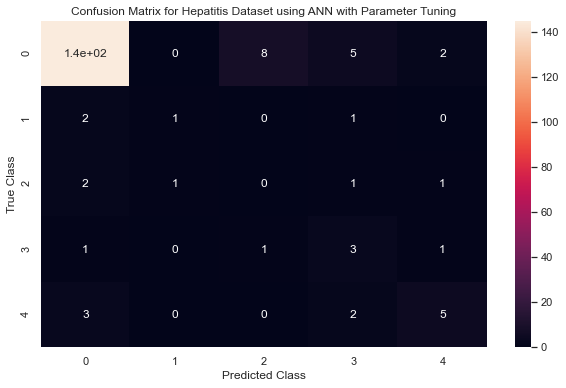

In [62]:
#Plotting confusion matrix

fig = plt.figure(figsize = (10, 6))
sns.heatmap(cmp, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix for Hepatitis Dataset using ANN with Parameter Tuning")